In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip "/content/drive/My Drive/MNIST Data.zip"

Streaming output truncated to the last 5000 lines.
  inflating: MNIST Data/testing/3/1690.png  
  inflating: __MACOSX/MNIST Data/testing/3/._1690.png  
  inflating: MNIST Data/testing/3/6857.png  
  inflating: __MACOSX/MNIST Data/testing/3/._6857.png  
  inflating: MNIST Data/testing/3/3085.png  
  inflating: __MACOSX/MNIST Data/testing/3/._3085.png  
  inflating: MNIST Data/testing/3/9219.png  
  inflating: __MACOSX/MNIST Data/testing/3/._9219.png  
  inflating: MNIST Data/testing/3/1889.png  
  inflating: __MACOSX/MNIST Data/testing/3/._1889.png  
  inflating: MNIST Data/testing/3/6116.png  
  inflating: __MACOSX/MNIST Data/testing/3/._6116.png  
  inflating: MNIST Data/testing/3/2364.png  
  inflating: __MACOSX/MNIST Data/testing/3/._2364.png  
  inflating: MNIST Data/testing/3/9231.png  
  inflating: __MACOSX/MNIST Data/testing/3/._9231.png  
  inflating: MNIST Data/testing/3/6664.png  
  inflating: __MACOSX/MNIST Data/testing/3/._6664.png  
  inflating: MNIST Data/testing/3/1490.p

In [4]:
import numpy as np
import random
import sklearn.datasets as ds
import matplotlib.pyplot as plt
import math
import sys
import glob
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.image as mpimg

%matplotlib inline
import seaborn as sns

Loading Dataset...
Dataset loaded...


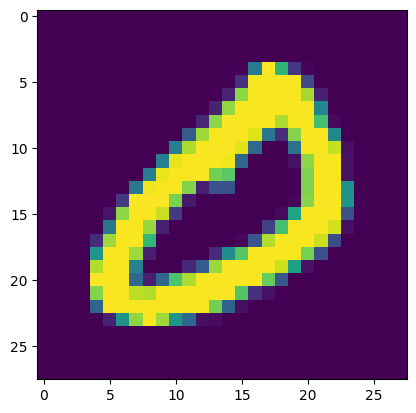

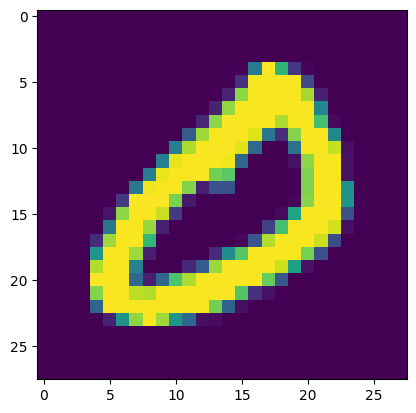

In [6]:
def MeanSubtraction(array):
    a = np.mean(array)
    return np.subtract(array,a)

def loadDataset(path):
    print('Loading Dataset...')

    train_x, train_y, test_x, test_y = [], [], [], []

    for i in range(10):
        for filename in glob.glob(path + '/training/' + str(i)+'/*.png'):
            im = mpimg.imread(filename)
            train_x.append(im)
            train_y.append(i)
        for filename in glob.glob(path + '/testing/' + str(i)+'/*.png'):
            im=mpimg.imread(filename)
            test_x.append(im)
            test_y.append(i)

    print('Dataset loaded...')

    return np.array(train_x), np.array(train_y), np.array(test_x),np.array(test_y)

train_x, train_y, test_x, test_y = loadDataset('/content/MNIST Data')

plt.imshow(train_x[5000])
plt.show()

train_x = MeanSubtraction(train_x)

plt.imshow(train_x[5000])


Size of the dataframe: (60000, 786)
Explained variation per principal component: [0.09604429 0.06985333 0.0625769 ]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...
[t-SNE] Computed neighbors for 10000 samples in 1.310s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.839189
[t-SNE] KL divergence after 250 iteratio

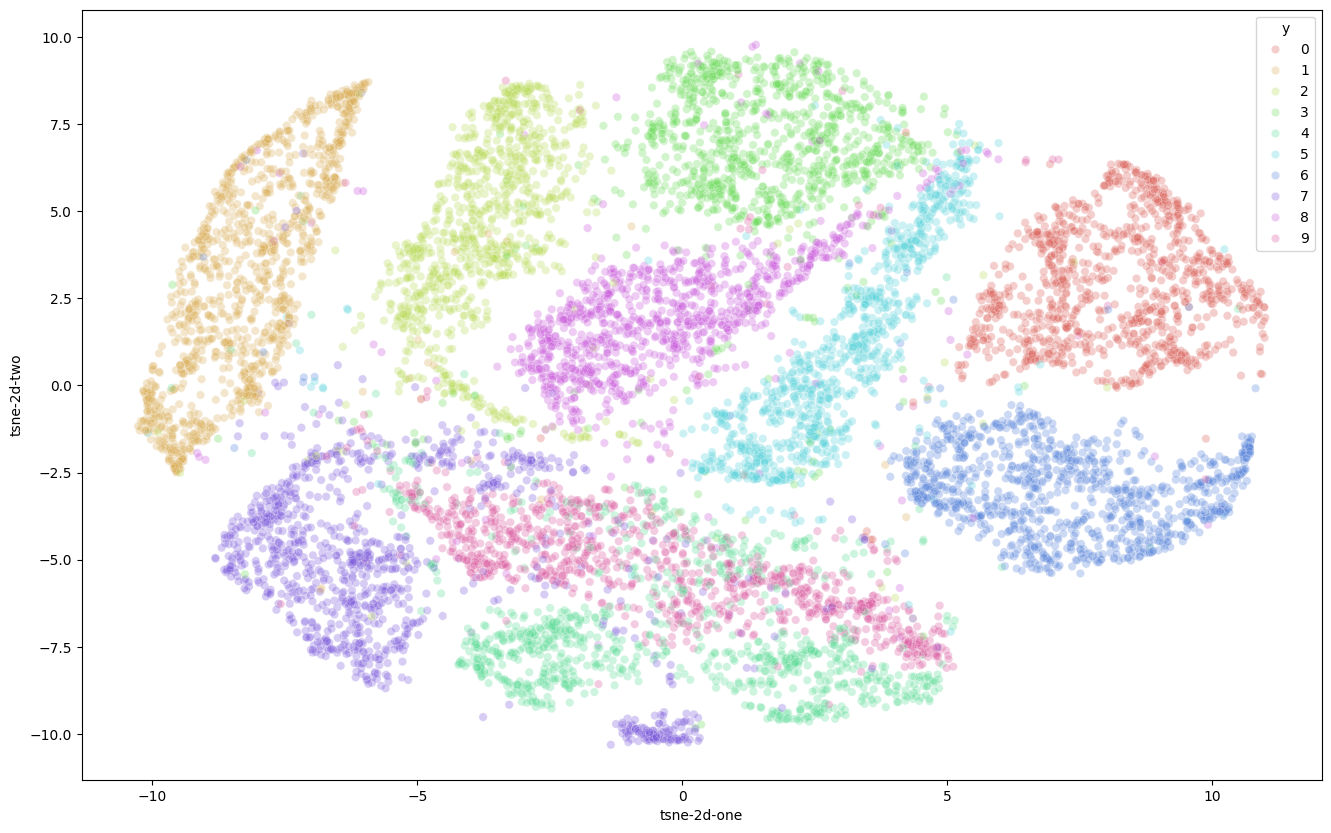

In [7]:
def TsnePlot(train_x,train_y):
    import pandas as pd
    feat_cols = ['pixel' + str(i) for i in range(train_x.shape[1])]
    df = pd.DataFrame(train_x, columns=feat_cols)
    df['y'] = train_y
    df['label'] = df['y'].apply(lambda i: str(i))
    X, y = None, None
    print('Size of the dataframe: {}'.format(df.shape))
    np.random.seed(42)
    rndperm = np.random.permutation(df.shape[0])


    N = 10000
    df_subset = df.loc[rndperm[:N],:].copy()
    data_subset = df_subset[feat_cols].values
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(data_subset)

    df_subset['pca-one'] = pca_result[:,0]
    df_subset['pca-two'] = pca_result[:,1]
    df_subset['pca-three'] = pca_result[:,2]

    print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

    pca_50 = PCA(n_components=50)
    pca_result_50 = pca_50.fit_transform(data_subset)
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(pca_result_50)

    df_subset['tsne-2d-one'] = tsne_results[:,0]
    df_subset['tsne-2d-two'] = tsne_results[:,1]
    plt.figure(figsize=(16,10))

    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="y",
        palette=sns.color_palette("hls", 10),
        data=df_subset,
        legend="full",
        alpha=0.3
    )

train_x = np.reshape(train_x,(train_x.shape[0],train_x.shape[1]*train_x.shape[2]))
test_x = np.reshape(test_x,(test_x.shape[0],test_x.shape[1]*test_x.shape[2]))

TsnePlot(train_x,train_y)

c = np.zeros((train_y.shape[0],10), dtype=int)

for j in range(len(c)):
    c[j][train_y[j]] = 1

train_y = c
d = np.zeros((test_y.shape[0],10), dtype=int)

for j in range(len(d)):
    d[j][test_y[j]] = 1
test_y = d
test_x = MeanSubtraction(test_x)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

In [8]:
from sklearn.utils import shuffle

train_xx,train_yy = shuffle(train_x,train_y)
test_x,test_y = shuffle(test_x,test_y)

train_pct_index = int(0.90 * len(train_xx))

train_x = train_xx[:train_pct_index]
train_y = train_yy[:train_pct_index]

validX = train_xx[train_pct_index:]
validY = train_yy[train_pct_index:]

train_x = np.append(train_x,np.ones([len(train_x), 1]), 1)
test_x = np.append(test_x,np.ones([len(test_x), 1]), 1)
validX = np.append(validX,np.ones([len(validX), 1]), 1)

In [15]:
class Neural_Network(object):
    def __init__(self,layers=2,inputSize = 784,neurons=[128, 64, 10]):
        self.inputSize = inputSize
        self.layers = layers
        self.neuron = neurons
        self.X1=None
        self.X2=None

        self.W1 = np.random.randn(inputSize+1,neurons[0])*np.sqrt(2/(inputSize+1+neurons[0]))
        self.W2 = np.random.randn(neurons[0]+1,neurons[1])*np.sqrt(2/(neurons[0]+1+neurons[1]))
        self.W3 = np.random.randn(neurons[1]+1,neurons[2])*np.sqrt(2/(neurons[1]+1+neurons[2]))

    def sigmoid(self, s):
        return 1/(1+np.exp(-s))

    def sigmoid_derivative(self, s):
        return s*(1-s)

    def softmax(self, s):
        exps=np.exp(s-np.max(s))

        return exps/np.sum(exps,axis=1,keepdims=True)

    def feedforward(self, X):
        self.X1=np.dot(X,self.W1)
        self.X1=self.sigmoid(self.X1)
        self.X1=np.append(self.X1,np.ones([len(self.X1),1]),1)
        self.X2=np.dot(self.X1,self.W2)
        self.X2=self.sigmoid(self.X2)
        self.X2=np.append(self.X2,np.ones([len(self.X2),1]),1)

        X3=np.dot(self.X2,self.W3)
        X3=self.softmax(X3)

        return X3

    def crossentropy(self, Y, Y_pred):
        return -(np.sum(Y*np.log(Y_pred+np.exp(-12))))/len(Y)

    def backwardpropagate(self,X, Y, y_pred, lr):
        Err=self.crossentropy(Y,y_pred)
        derror=y_pred-Y
        ss=np.dot(self.X2.transpose(),derror)
        ss=lr*ss

        ss1=np.dot(self.W3,derror.transpose())
        ss1=ss1.transpose()*self.sigmoid_derivative(self.X2)
        ss3=np.dot(self.X1.transpose(),ss1)
        ss3=ss3[:,:-1]
        ss3=lr*ss3

        ss2=ss1[:,:-1]
        ss2=np.dot(self.W2,ss2.transpose())
        ss2=ss2.transpose()*self.sigmoid_derivative(self.X1)
        ss2=np.dot(X.transpose(),ss2)
        ss2=ss2[:,:-1]
        ss2=lr*ss2

        self.W1=self.W1-ss2
        self.W2=self.W2-ss3
        self.W3=self.W3-ss

        return np.sum(Err)

    def predict(self, testX):
        return self.feedforward(testX)

    def accuracy(self, testX, testY):
        prediction=self.predict(testX)
        predict=np.argmax(prediction, axis = 1)
        groundtruth=np.argmax(testY, axis = 1)

        acc=0

        for i in range(len(predict)):
            if(predict[i]==groundtruth[i]):
                acc=acc+1
        acc=(acc/len(predict))*100

        return acc

    def confusion(self,testX,testY):
        prediction=self.predict(testX)
        predict=np.argmax(prediction, axis = 1)
        groundtruth=np.argmax(testY, axis = 1)
        Matrix=np.zeros((10,10),dtype=int)

        for j in range(len(groundtruth)):
            Matrix[groundtruth[j]][predict[j]]=Matrix[groundtruth[j]][predict[j]]+1

        return Matrix

    def SGD(self, X, Y, learningRate , batchSize):
        losses = []

        for i in range(0, X.shape[0], batchSize):
            batchX = X[i : i + batchSize]
            batchy = Y[i : i + batchSize]
            y_pred = self.feedforward(batchX)
            loss = self.crossentropy(batchy, y_pred)
            self.backwardpropagate(batchX, batchy, y_pred, learningRate)

        return loss

    def train(self, train_set_x, train_set_y, test_x,test_y, learning_rate, batch_size, training_epochs):
        plotting=list()
        accuracys=list()
        valplot=list()
        valacc=list()

        for j in range(training_epochs):
            tloss=self.SGD( train_set_x, train_set_y, learning_rate , batch_size)
            plotting.append(tloss)
            accuracys.append(self.accuracy(train_set_x,train_set_y))
            testloss=self.crossentropy(test_y,self.feedforward(test_x))
            valplot.append(testloss)
            valacc.append(self.accuracy(test_x,test_y))
            print(f'Epoch {j+1} : Training Loss = {tloss:.4f}, Training Accuracy = {self.accuracy(train_set_x, train_set_y):.4f}, Testing Loss = {testloss:.4f}, Testing Accuracy = {self.accuracy(test_x, test_y):.4f}')

        plt.plot(plotting)
        plt.plot(valplot)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()
        plt.plot(accuracys)
        plt.plot(valacc)
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.show()

    def saveModel(self, name):
        np.savez(name+'.npz', name1=self.W1, name2=self.W2,name3=self.W3)

    def loadModel(self, name):
        data = np.load(name+'.npz')
        self.W1=data['name1']
        self.W2=data['name2']
        self.W3=data['name3']




Epoch 1 : Training Loss = 2.2579, Training Accuracy = 30.6204, Testing Loss = 2.2434, Testing Accuracy = 30.5900
Epoch 2 : Training Loss = 2.1982, Training Accuracy = 47.8111, Testing Loss = 2.1702, Testing Accuracy = 47.4600
Epoch 3 : Training Loss = 2.1113, Training Accuracy = 55.0870, Testing Loss = 2.0625, Testing Accuracy = 55.3500
Epoch 4 : Training Loss = 1.9811, Training Accuracy = 59.2611, Testing Loss = 1.9015, Testing Accuracy = 59.3500
Epoch 5 : Training Loss = 1.8048, Training Accuracy = 62.8907, Testing Loss = 1.6885, Testing Accuracy = 63.2900
Epoch 6 : Training Loss = 1.6082, Training Accuracy = 66.9074, Testing Loss = 1.4611, Testing Accuracy = 67.7800
Epoch 7 : Training Loss = 1.4286, Training Accuracy = 70.9259, Testing Loss = 1.2619, Testing Accuracy = 72.2700
Epoch 8 : Training Loss = 1.2838, Training Accuracy = 74.1463, Testing Loss = 1.1057, Testing Accuracy = 74.9300
Epoch 9 : Training Loss = 1.1708, Training Accuracy = 76.6093, Testing Loss = 0.9863, Testing Ac

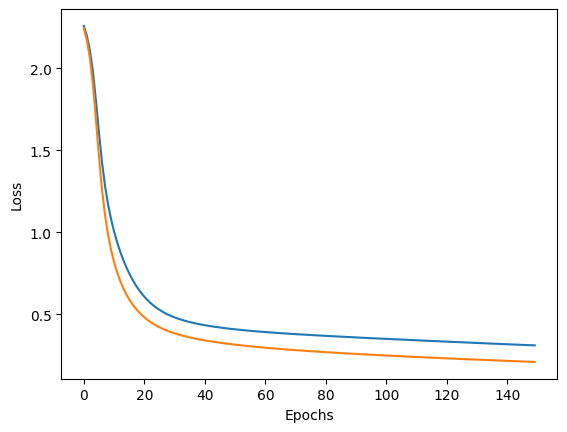

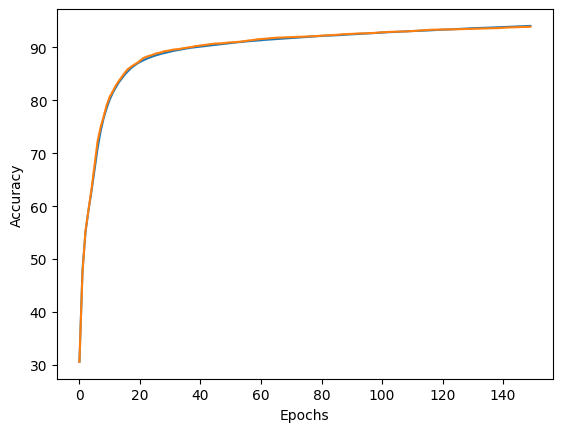

In [16]:
model = Neural_Network(2, 784, [128, 64, 10])

model.train(train_x, train_y, test_x, test_y, 0.0001, 64, 150)

In [17]:
model.confusion(train_x, train_y)

array([[5173,    0,   15,    8,    8,   34,   28,    8,   34,    8],
       [   0, 5929,   32,   24,    8,   20,    6,   19,   45,   10],
       [  30,   36, 4990,   44,   64,   11,   50,   55,   85,   11],
       [  16,   23,   82, 5019,    4,  151,   19,   51,   89,   47],
       [  11,   23,   22,    4, 4941,    3,   46,    7,   21,  154],
       [  57,   24,   17,  128,   39, 4454,   74,   10,   66,   43],
       [  22,   13,   24,    0,   36,   65, 5130,    1,   15,    0],
       [  13,   31,   58,   15,   40,    8,    2, 5404,    6,  101],
       [  19,   90,   43,   89,   26,   71,   42,    8, 4799,   55],
       [  26,   18,    8,   58,  127,   19,    1,  117,   40, 4930]])

In [18]:
model.confusion(validX, validY)

array([[590,   0,   2,   1,   1,   3,   3,   0,   7,   0],
       [  1, 626,   3,   2,   0,   1,   1,   1,  14,   0],
       [  4,   4, 538,   6,   5,   0,   5,   9,  10,   1],
       [  0,   5,  13, 573,   0,  17,   3,   6,   7,   6],
       [  0,   2,   2,   0, 577,   0,   5,   2,   3,  19],
       [  4,   1,   1,   5,   3, 468,   9,   2,   9,   7],
       [ 10,   2,   8,   0,   5,   4, 581,   0,   2,   0],
       [  0,   2,   9,   1,   3,   0,   1, 564,   0,   7],
       [  3,   5,   6,  11,   5,  11,   4,   3, 552,   9],
       [  4,   5,   3,   4,  14,   3,   0,  15,   5, 552]])

In [19]:
model.confusion(test_x, test_y)

array([[ 964,    0,    2,    1,    0,    3,    7,    1,    2,    0],
       [   0, 1110,    3,    2,    0,    2,    3,    2,   13,    0],
       [   9,    4,  956,    7,   10,    1,   12,   11,   20,    2],
       [   1,    1,   14,  941,    0,   18,    2,   13,   15,    5],
       [   1,    2,    5,    0,  927,    0,   11,    3,    5,   28],
       [   9,    3,    3,   35,    6,  795,   13,    5,   15,    8],
       [  13,    3,    4,    0,    7,    8,  917,    2,    4,    0],
       [   4,    8,   25,    6,    6,    0,    0,  958,    1,   20],
       [   5,    5,    5,   22,    9,   14,   13,   10,  887,    4],
       [  12,    7,    1,   10,   27,    5,    0,   12,    4,  931]])

In [24]:
model.accuracy(train_x, train_y)

94.01666666666667

In [25]:
model.accuracy(test_x, test_y)

93.86

In [26]:
model.accuracy(validX, validY)

93.68333333333332

In [27]:
model.saveModel('model')